<a href="https://colab.research.google.com/github/Oseiasdfarias/Control_Sys_Python/blob/main/Controle_Malha_Aberta/controle_Malha_Aberta_CircuitoRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**CONTROLE EM MALHA ABERTA DE UM CIRCUITO RC**<center/>
# <center>**SIMULAÇÃO EM PYTHON**<center/>

<br/>

>> Controle em Malha Aberta de um Circuito RC Usando a **Liguagem de Programação Python** e a **Biblioteca de Controle (Control)**

# **Diagrama do Circuito RC**

 <br/> <br/> 

<center><img src="https://github.com/Oseiasdfarias/Control_Sys_Python/blob/main/Controle_Malha_Aberta/diagrama_controle_circuito_rc_malha_aberta.png?raw=true" width="900"></center>

 <br/> <br/> 

## **Modelo Matemático do Circuito RC**

$$v_o = v_c = v_i - v_R$$

<br/>

$$v_R = Ri_c = RC\dfrac{dv_c}{dt}$$

<br/>

$$v_o = v_i - RC\dfrac{dv_o}{dt}$$

<br/>

$$v_i = RC\dfrac{dv_o}{dt} + v_o$$

<br/>

### **Aplicando a Transformada de Laplace**

$$v_i = RCsv_o + v_o$$

<br/>

### **Função de Transferência do Circuito RC com saída no Capacitor**
<br/>

$$\dfrac{v_o}{v_i} = \dfrac{1}{(1 + RCs)}$$



<br/>
<br/>

---

<br/>
<br/>





# <center> **Aplicando a Teoria de Controle Clássico para Malha Aberta**
<center/>

### **Entrada do Sistema**
>> Vamos aplicar um degrau unitário no entrada do sistema

$$v_i = \dfrac{1}{s}$$

### **Modelo no Domínio** $S$
>> Essa é a Função de Transferência do Circuito **RC**

$$\dfrac{v_o}{v_i} = \dfrac{1}{RCs + 1}$$


### **Saída do Sistema no Domínio** $S$
>> Essa é a resposta do Circuito RC ao Degrau unitário

$$V_o = v_i \dfrac{v_o}{v_i} = \dfrac{1}{s(RCs + 1)}$$


### **Saída do Sistema no Domínio** $t$

$$v_o = 1 - e^{\dfrac{t}{RC}}$$

<br/>
<br/>

---

<br/>
<br/>

#<center>**SIMULAÇÃO USANDO PYTHON**<center/>

### **Instalando a Biblioteca Control**

In [1]:
! pip3 install control

     |████████████████████████████████| 339 kB 5.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=3d43318e2816170bb37719752ff81c954d99314bca0b4368452b0ca9a2e3d7ce
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


### **Importando as bibliotecas que usaremos na simulação**

In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### **Código de Simulação**

Função de Transferência em Malha Aberta: 
  1
-----
s + 1



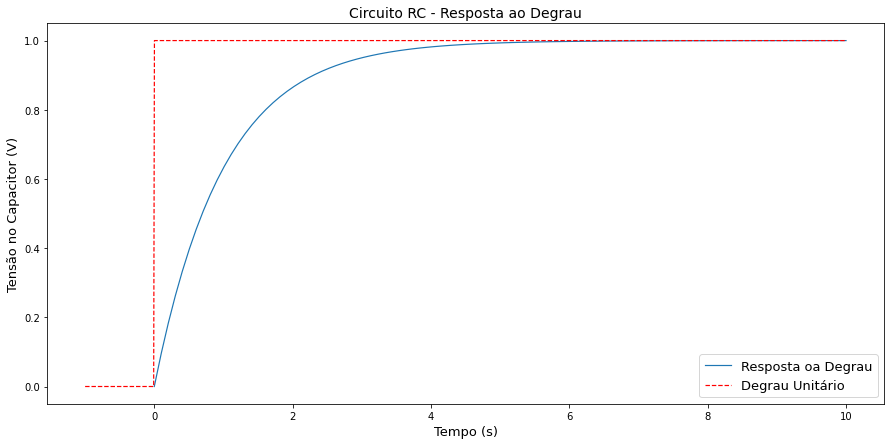

In [3]:
# Criando as Função de Transferência em Malha Aberta

# Valores do Resistor e Capacitor
R = 1.
C = 1.

# Tempo de Simulação
Temp_Sim = 10

# Criando o Numerador da Função de Transferência
numerador = [1.]

# Criando o Denominador da Função de Transferência
denominador = [R*C, 1.]

# Criando a Função de Transferência usando o método ctl.tf() da biblioteca Control
H_s = ctl.tf(numerador, denominador)
print(f"Função de Transferência em Malha Aberta: {H_s}")

# Calculando a resposta ao degrau unitário usando o métoda ctl.step_response()
# da biblioteca Control  
T, yout = ctl.step_response(H_s, Temp_Sim)

# Plotando a resposta ao Degrau usando o metodo plt.plot() da biblioteca matplotlib
plt.figure(figsize=(15, 7))
plt.plot(T, yout, linewidth = 1.2)

# Plotando o degrau unitário
Temp_deg = np.linspace(-1., 10., 1000)
degrau = np.ones_like(Temp_deg)
degrau[Temp_deg < 0] = 0
plt.plot(Temp_deg, degrau, color = "r", linestyle = "--", linewidth = 1.2)

# Customizando a figura com Titulo,  Títulos nos eixos, Legenda e Grid
plt.title("Circuito RC - Resposta ao Degrau", fontsize =  14)
plt.ylabel("Tensão no Capacitor (V)", fontsize = 13)
plt.xlabel("Tempo (s)", fontsize = 13)
plt.legend(["Resposta oa Degrau", "Degrau Unitário"], fontsize = 13)
#plt.grid()
plt.show()

